In [3]:
#first ill test it out on some simpler solutions:
from scipy.optimize import curve_fit
import random

from astropy.io import fits
import numpy as np
import scipy.interpolate
from scipy.interpolate import splev, splrep

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

Stuff I dont need to see anymore

In [4]:
#linear solutions

# def linearFunc(x,intercept,slope):
#     y = intercept + slope * x
#     return y

In [5]:
#importing some data 
# x = np.linspace(1,10,10) 
# y = np.linspace(1,10,10)
# rand = []
# for i in np.arange(10):
#     rand = np.append(rand, random.random())



In [6]:
# plt.scatter(x,y)

In [7]:
# a_fit,cov=curve_fit(linearFunc,x,y,sigma = rand,absolute_sigma=True)

In [8]:
# inter = a_fit[0]
# slope = a_fit[1]
# d_inter = np.sqrt(cov[0][0])
# d_slope = np.sqrt(cov[1][1])

In [9]:
# # Create a graph showing the data.
# plt.figure(figsize = (6,4))
# plt.errorbar(x,y,yerr=rand,fmt='r.',label='Data')

# # Compute a best fit line from the fit intercept and slope.
# yfit = inter + slope*x

# # Create a graph of the fit to the data. We just use the ordinary plot
# # command for this.
# plt.plot(x,yfit,label='Fit')

# # Display a legend, label the x and y axes and title the graph.
# plt.legend()
# plt.xlabel('x')
# plt.ylabel('y')

# # Save the figure to a file
# plt.savefig('FakeDataPlot_with_error.png',dpi=300)

# # Show the graph in a new window on the users screen.
# plt.show()

In [10]:
# def quadratic(x,a,b,c):
#     return a*x**2 + b*x + c

In [11]:
# x_2 = np.linspace(-5,5,10)
# y_2 = x_2**2 + rand

In [14]:
# b_fit,cov=curve_fit(quadratic,x,y_2,sigma = rand,absolute_sigma=True)

In [15]:
# a = b_fit[0]
# b = b_fit[1]
# c = b_fit[2]
# y_fit2 = quadratic(x,a,b,c)

In [16]:
# plt.scatter(x,y_2)
# plt.plot(x,y_fit2)

In [17]:
#okie now its time to do some gaussians: 
def gaussian(x,a, b, c):
    '''a is amplitude, b is  the mean (where i think it is), c is standard deviation (sqrt(variance))''' 
    return -a*np.e**(-(x-b)**2/(2*c**2)) +1

In [18]:
x = np.linspace(-10,10,4)
y = gaussian(x,1,1,3) 
y_err = []
for i in y:
    y_err = np.append(y_err, random.random())

In [19]:
b_fit,cov = curve_fit(gaussian,x,y,sigma = y_err*3,absolute_sigma=True)

In [20]:
a = b_fit[0]
b = b_fit[1]
c = b_fit[2]
print(a,b,c)

1.0000000000000004 0.9999999999999991 2.9999999999999987


In [21]:
fit_gaussian = gaussian(x,a,b,c)

In [22]:
# plt.plot(x,fit_gaussian)
# plt.scatter(x,y) 

In [23]:
#defining periodic gaussians: 
# def periodic_gaussian(x,sigma,l,xprime,p):
#     exponent = []
#     function = []
#     for i in x:
#         exponent = np.append(exponent,-2/l**2 * (np.sin(np.pi*(((i-xprime)/p))))**2)
#     function = np.append(function,sigma**2 * np.e**exponent)
#     return function

In [24]:
# #defining periodic gaussians: bebugging since it takes too long  
# def periodic_gaussian_test(x,sigma,l,xprime,p):
#     exponent = -2/l**2 * (np.sin(np.pi*(((x-xprime)/p))))**2
#     return sigma**2 * np.e**exponent

In [25]:
# x_periodic = np.linspace(-10,10,200)
# y_periodic = periodic_gaussian_test(x_periodic,1,1,1,5)

In [26]:
#plt.figure(figsize = (8,6))
# plt.plot(x_periodic,y_periodic)

In [27]:
# b_fit,cov = curve_fit(periodic_gaussian_test,x_periodic,y_periodic,absolute_sigma=True)

In [28]:
# b_fit

In [29]:
# y_fit = periodic_gaussian_test(x_periodic,b_fit[0],b_fit[1],b_fit[2],b_fit[3])

In [30]:
# plt.plot(x_periodic,y_fit)
# plt.scatter(x_periodic,y_periodic, marker ='.')

In [31]:
import pandas as pd

In [32]:
data = pd.read_csv('C:\\Users\\alica\\workspace\\Fraunhofer Line Drafts\\tau_ceti_shifted_spectrum.zip')

In [33]:
pd.set_option('display.max_rows', 10)

In [34]:
display(data)

,Unnamed: 0,shifted wavelength,shifted flux
0,0,5837.733295,0.950702
1,1,5837.752767,0.930930
2,2,5837.772240,1.008261
3,3,5837.791713,0.942884
4,4,5837.811185,1.003895
...,...,...,...
5601,5601,5947.824252,0.994086
5602,5602,5947.844092,0.963288
5603,5603,5947.863932,1.009402
5604,5604,5947.883772,1.008527


In [35]:
wl = data['shifted wavelength'].to_numpy()

In [36]:
fl = data['shifted flux'].to_numpy()

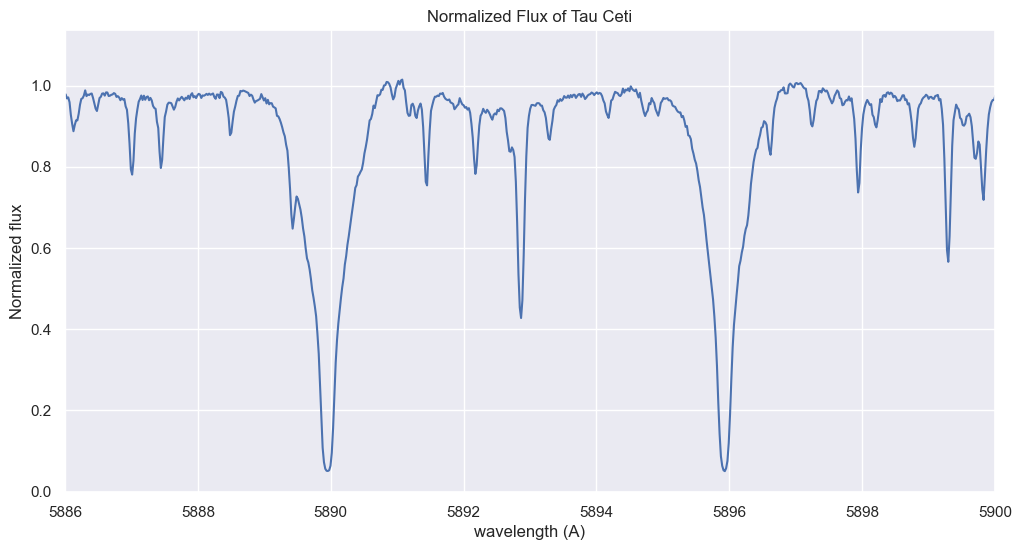

In [37]:
plt.figure(figsize = (12,6))
plt.plot(wl,fl)
plt.xlabel('wavelength (A)')
plt.ylabel('Normalized flux')
plt.title('Normalized Flux of Tau Ceti')
plt.xlim(5886,5900)
plt.show()

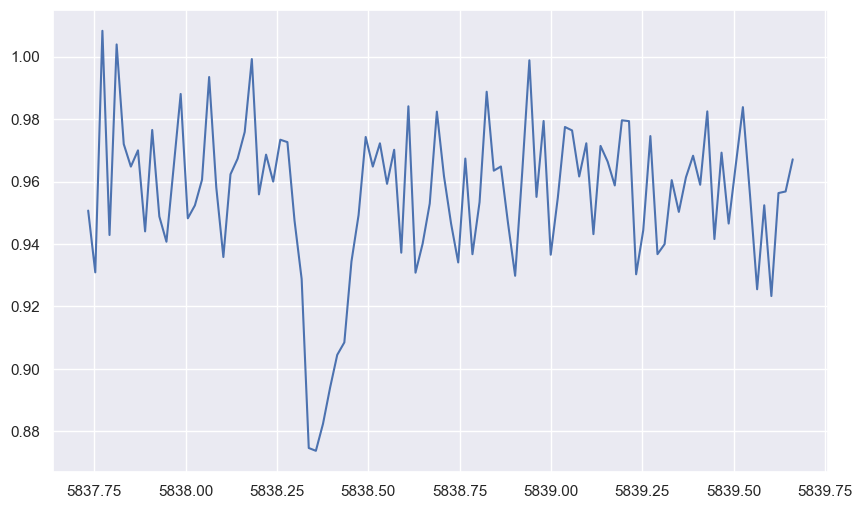

In [38]:
#testing finding mins: 
plt.figure(figsize = (10,6))
range_wl = wl[0:100]
range_fl = fl[0:100]
plt.plot(range_wl,range_fl)

In [39]:
fl_mins = []
wl_min_values = []
interval = len(range_wl)

for i in np.arange(interval): 
    if range_fl[i] < 0.95:
        fl_mins = np.append(fl_mins, range_fl[i])
        wl_min_values = np.append(wl_min_values, range_wl[i])
        
fl_mins

array([0.9309297 , 0.94288369, 0.94404519, 0.94882473, 0.94073105,
       0.94822866, 0.93583546, 0.94748257, 0.92880483, 0.87469575,
       0.8737976 , 0.88242622, 0.89404081, 0.90451076, 0.90850285,
       0.93440501, 0.94926659, 0.93722341, 0.93083325, 0.94009446,
       0.94650499, 0.93409992, 0.93673867, 0.94665479, 0.9298299 ,
       0.93657388, 0.94316272, 0.93030804, 0.94441301, 0.93675069,
       0.93995606, 0.94159331, 0.94655413, 0.92550985, 0.92334522])

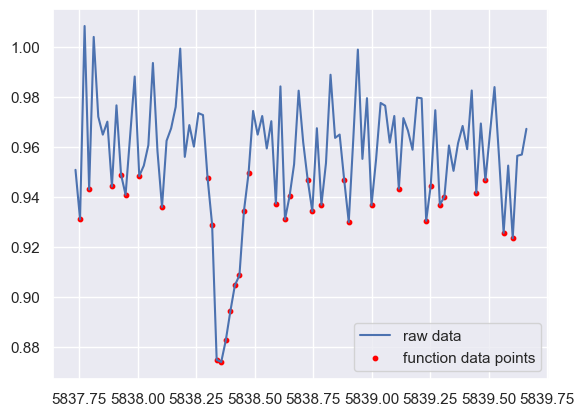

In [40]:
plt.plot(range_wl,range_fl, label = 'raw data')
plt.scatter(wl_min_values,fl_mins, s= 10, color = 'red', label = 'function data points')
plt.legend()
plt.show()

## idea: if the difference between two points is positive, then it is probably a min? 

or ig we could do it where we check either side, like if (i-1) - i is negative and i - (i+1) is positive, then i is a local min. and then we can set a catch all maximum value to get rid of the tiny lines. 

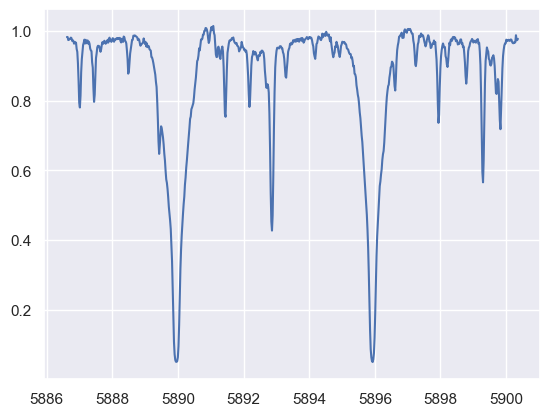

In [41]:
#lets try the either side thing: 
#this assumes that the end points arent minima 

range_wl = wl[2500:3200]
range_fl = fl[2500:3200]
plt.plot(range_wl,range_fl)
plt.show()

In [42]:
fl_mins = []
wl_min_values = []
fl_maxs = [] #maybe?
wl_max_values = []
interval = len(range_wl)

for i in np.arange(1,interval-1): 
    #setting a minimum separation for neighboring points to be candidates:
    if range_fl[i] < 0.9:
        if abs(range_fl[i-1] - range_fl[i]) > 0.001:
            #minima 
            if range_fl[i-1] > range_fl[i] and range_fl[i] < range_fl[i+1]:
                fl_mins = np.append(fl_mins, range_fl[i])
                wl_min_values = np.append(wl_min_values, range_wl[i])
    if range_fl[i] > 0.95:  
            #perhaps flipping it is max 
            if range_fl[i-1] < range_fl[i] and range_fl[i] > range_fl[i+1]:
                fl_maxs = np.append(fl_maxs, range_fl[i])
                wl_max_values = np.append(wl_max_values, range_wl[i])
        
        


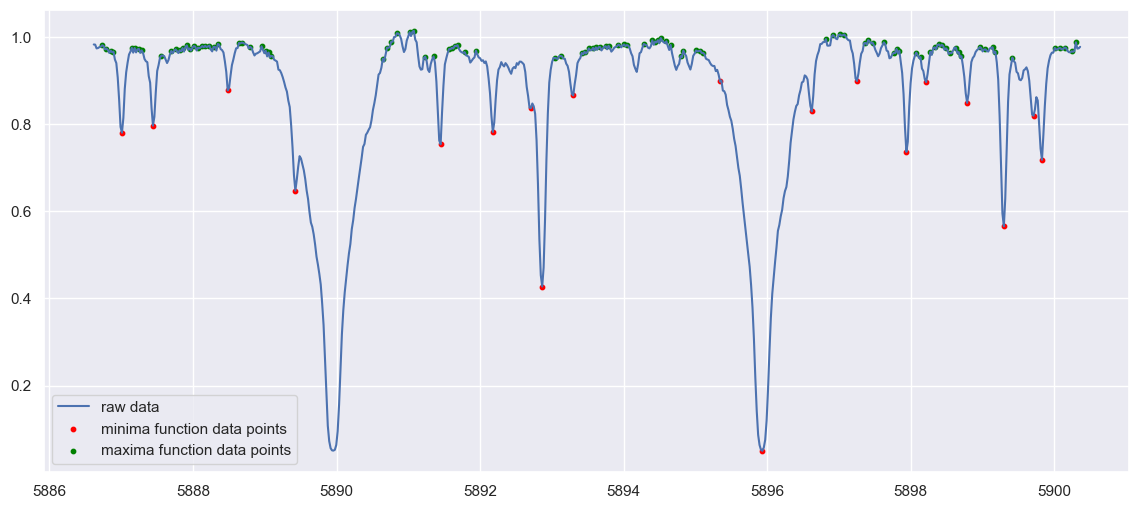

In [43]:
plt.figure(figsize = (14,6))

plt.plot(range_wl,range_fl,label = 'raw data')
plt.scatter(wl_min_values,fl_mins, s= 10, color = 'red', label = 'minima function data points')
plt.scatter(wl_max_values,fl_maxs, s= 10, color = 'green', label = 'maxima function data points')
plt.legend()
plt.show()

## okie i think we have some data points, so lets start making some gaussians! 
lets first start with a VERY small range and see if we can make: 3 gaussian fits using a for loop and some curve fitting

test to give our gaussian points because it must be a min between two maxima to be a valid wavelength range. I kind of thought there would be more points to work with, but hmmm lets see what we can do!


new idea: lets try setting the range of each gaussian to be the range between neighboring minima? 

In [42]:
#defining the given ranges: (will be a 2d array)
test_range = []
test_flux = []
total_wl_ranges = []
total_fl_ranges = []
mins = wl_min_values[0:6]

for m in mins: #prints all values as floats 
    for i in np.arange(len(range_wl)):
        if range_wl[i] <= m:
            test_range.append(range_wl[i])
            test_flux.append(range_fl[i]) 
    total_fl_ranges.append(test_flux) 
    total_wl_ranges.append(test_range)
    
    #resetting the lists:
    test_range = []
    test_flux = []
    

mins

array([5887.0109389 , 5887.44296704, 5888.48389229, 5889.42677587,
       5891.45055648, 5892.1777154 ])

In [43]:
subplot_a_fl = total_fl_ranges[1]
subplot_a_wl = total_wl_ranges[1]


In [44]:

subplot_a_fl = np.array(subplot_a_fl)
type(subplot_a_fl)

numpy.ndarray

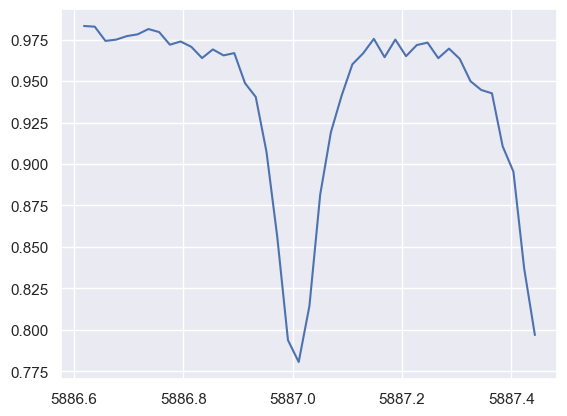

In [45]:
plt.plot(subplot_a_wl,subplot_a_fl)
plt.show()

In [46]:
#test_gaussian_fit: 

# def gaussian(x,a, b, c):
#     '''a is amplitude, b is  the mean (where i think it is), c is standard deviation (sqrt(variance))''' 
#     return -a*np.e**(-(x-b)**2/(2*c**2)) +1

altered_flux  = np.array(subplot_a_fl)
altered_flux = -altered_flux[0:35] +1
altered_wl = np.array(subplot_a_wl)
altered_wl = altered_wl[0:35]
err = altered_flux /len(altered_flux)
altered_flux

array([0.01684445, 0.01722649, 0.02583653, 0.02504132, 0.02291411,
       0.02186179, 0.01867129, 0.02049268, 0.02809962, 0.02618544,
       0.02939954, 0.03616826, 0.03096088, 0.03455095, 0.03317758,
       0.0513097 , 0.05960515, 0.09271367, 0.14377539, 0.20615891,
       0.2193298 , 0.18551252, 0.11853637, 0.08082345, 0.05878267,
       0.03991682, 0.03331965, 0.0245905 , 0.03563704, 0.02502588,
       0.03502899, 0.02832316, 0.02686461, 0.03622048, 0.03047639])

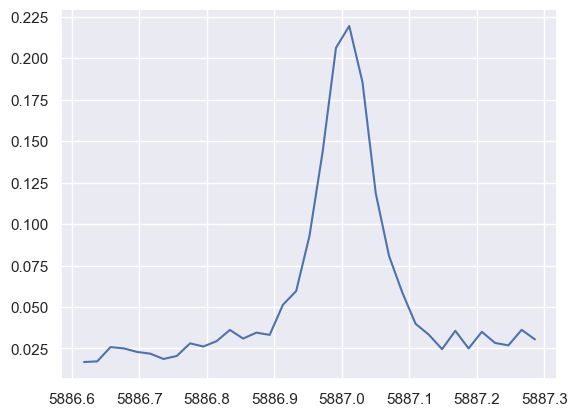

In [47]:
plt.plot(altered_wl,altered_flux)

In [48]:
test_gaussian_fit = curve_fit(gaussian,altered_wl,altered_flux, sigma = err, absolute_sigma=True)

C:\Users\alica\anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [49]:
test_gaussian_fit

(array([1., 1., 1.]),
 array([[inf, inf, inf],
        [inf, inf, inf],
        [inf, inf, inf]]))

In [50]:
graph_maybe = gaussian(altered_wl,1,1,1) 
graph_maybe 

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.])

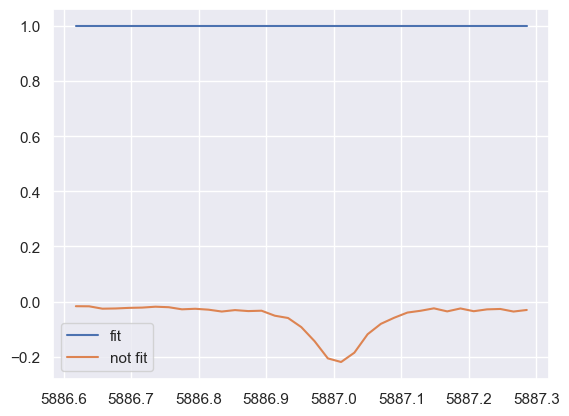

In [51]:
#plt.plot(altered_wl, altered_flux)
plt.plot(altered_wl, graph_maybe, label = 'fit')
plt.plot(altered_wl,-altered_flux, label = 'not fit')
plt.legend()

In [85]:
test_fit = gaussian(np.linspace(5000,6000,100),1,5886,1)

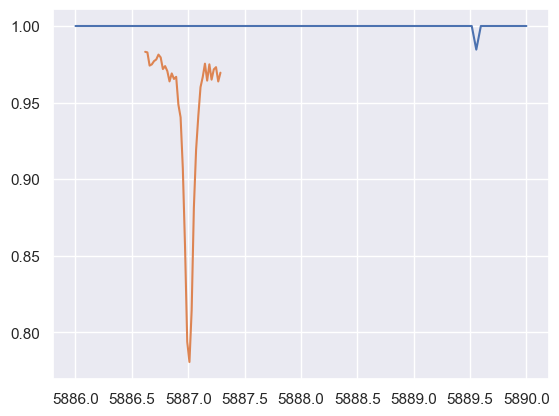

In [86]:
plt.plot(np.linspace(5886,5890,100),test_fit)
plt.plot(altered_wl,-altered_flux +1, label = 'not fit')

In [54]:
altered_wl[1]

5886.637849207695

In [55]:
test_array = np.array([0,1,2])

In [56]:
type(test_array)

numpy.ndarray

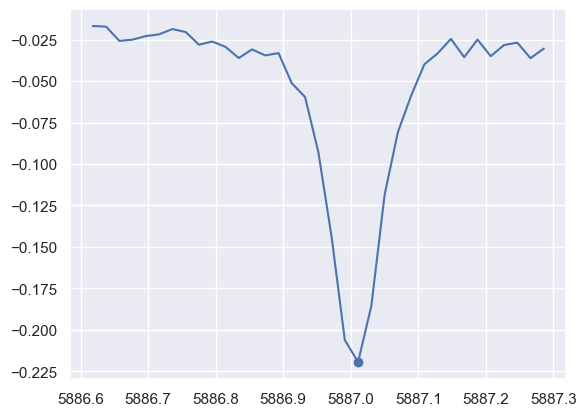

In [57]:
i = np.argmin(subplot_a_fl)
plt.plot(altered_wl,-altered_flux, label = 'not fit')
plt.scatter(altered_wl[i],-altered_flux[i], label = 'not fit')

Plan:
    
1. perform proper gaussian fits for each wl range using the found local minima 
2. plot them to check that its accurate 
3. find sigma to estimate PSF of each gaussian fit
4. find the average PSF value via histogram

issue:

1. gaussian fit is not plotting in the correct range 
   > use inital conditions P0 to give curve fit some help 
   
things to consider: 

1. finding error in our analysis 
    > debug flags 
2. unit tests 
    > always works so you always know the answer
    > tells you your code is still working


## outline for curvfitting function:

it will have initial conditions, 

where the amplitude is about 0.5, 

the mean is the found minimum value, 

and the c value is 0.1

this can be tweaked so lets see how it goes

In [1]:
#defining simple curve fit:
#first lets find some maxima, i think that will work better. 



